In [1]:
'''General Libraries'''
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 500)

'''Statistic'''
import scipy
from scipy import stats
from scipy.stats import norm
import datetime

'''Scikit Learn'''
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

'''Ploting Libraries'''
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "iframe" 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style 
style.use("fivethirtyeight") 

import seaborn as sns
sns.set_palette('RdBu')

import warnings
warnings.filterwarnings("ignore")

'''Miscellaneous'''

'''Seeds'''
import random
random.seed(10)
np.random.seed(11)

In [2]:
df = pd.read_csv('data_Preprocessed_Onehot.csv')

In [3]:
df

,official,age,gender_F,gender_M
0,0.012196,0.460317,0,1
1,0.153041,0.238095,1,0
2,0.000000,0.365079,0,1
3,0.157316,0.095238,1,0
4,0.001652,0.349206,0,1
...,...,...,...,...
31629,0.343982,0.222222,0,1
31630,0.582055,0.253968,0,1
31631,0.528235,0.047619,1,0
31632,0.582606,0.317460,1,0


# K-mean Clustering

## Optimum K

### Elbow Method

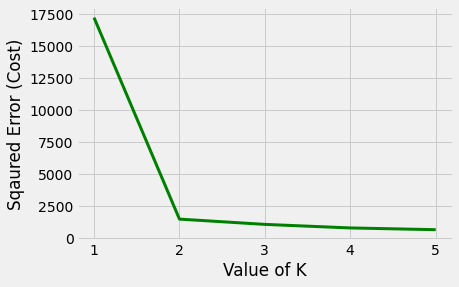

In [6]:
cost =[] 

the_range = range(1, 6)

for i in the_range: 
    km = KMeans(n_clusters = i, 
                init='k-means++',
                max_iter = 300,
                random_state=10,
                n_jobs=-1) 
    km.fit(df) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(km.inertia_)      
  
# plot the cost against K values 
plt.plot(the_range, cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

## Clustering Labels

In [7]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(df)

cluster = pd.DataFrame(data=cluster_labels, columns=['cluster'])

cluster.to_csv('clusters_kmeans_2.csv', index=False)